In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Preprocessing
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder,LabelEncoder
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer,KNNImputer,IterativeImputer


#Model Selection
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.linear_model import LinearRegression,LogisticRegression,Lasso,Ridge,LassoCV,RidgeCV
from sklearn.svm import SVC,SVR
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor

#Model Evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,root_mean_squared_error

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
df.shape

(1338, 7)

In [5]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
X = df.drop(columns=['charges'])
y = df['charges']

In [7]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [8]:
categorical_features = df.select_dtypes(include=['object'])
numerical_features = df.select_dtypes(include=['int','float'])

In [25]:
# Column Transformer
preprocess = ColumnTransformer(
    transformers=[
        ('gender', OrdinalEncoder(categories=[['female', 'male']]), ['sex']),
        ('smok',OrdinalEncoder(categories=[['no','yes']]),['smoker']),
        ('region_enc',OneHotEncoder(handle_unknown='ignore'),['region']),
        ('num',StandardScaler(),['age', 'bmi', 'children'])
    ]
)
    

In [27]:
models = {
     'KNN' : KNeighborsRegressor(algorithm='kd_tree', leaf_size=3, n_neighbors=3),
    'SVM':SVR (C = 90, gamma =0.02),
    'Linear Regression':LinearRegression(),
    'Decision Tree':DecisionTreeRegressor(criterion='absolute_error', max_depth=5,min_samples_leaf=7, min_samples_split=4),
    'Random Forest':RandomForestRegressor(criterion='absolute_error', max_depth=10,
                      min_samples_leaf=5, min_samples_split=10,
                      n_estimators=14)
      }

In [33]:
results = []
for name,model in models.items():
    pipe = Pipeline([
        ('Preprocessing',preprocess),
        ('Regression',model)
    ])
    
    pipe.fit(x_train,y_train) #Model Training

    y_pred = pipe.predict(x_test) # Model Prediction
    
    #Evaluation Metrics
    print(f'Model Applied :{name}') 
    print("-------------------------- Train Result ------------------------------------")
    train_score = pipe.score(x_train,y_train)
    print(f'Train Score :{train_score}')
    print("========================== Test Result =====================================")
    r2score = r2_score(y_test,y_pred)
    print(f'Test Score :{r2score}')
    mae = mean_absolute_error(y_test,y_pred)
    mse = mean_squared_error(y_test,y_pred)
    rmse = root_mean_squared_error(y_test,y_pred)

    results.append({
        'Model' : name,
        'Train Score' : train_score,
        'Test Score' : r2score,
        'MSE' : mse,
        'MAE' : mae,
        'RMSE' : rmse
    })


Model Applied :KNN
-------------------------- Train Result ------------------------------------
Train Score :0.8414030198339374
========================== Test Result =====================================
Test Score :0.7009345592641503
Model Applied :SVM
-------------------------- Train Result ------------------------------------
Train Score :-0.059848392183486254
========================== Test Result =====================================
Test Score :-0.052070115616987156
Model Applied :Linear Regression
-------------------------- Train Result ------------------------------------
Train Score :0.7449555328228536
========================== Test Result =====================================
Test Score :0.7672642952734358
Model Applied :Decision Tree
-------------------------- Train Result ------------------------------------
Train Score :0.8591015662130937
========================== Test Result =====================================
Test Score :0.8507975499287902
Model Applied :Random Fore

In [37]:
results_df = pd.DataFrame(results).sort_values(by="Test Score", ascending=False)

In [39]:
print("\n📊 Model Performance Comparison:\n")
results_df


📊 Model Performance Comparison:



,Model,Train Score,Test Score,MSE,MAE,RMSE
4,Random Forest,0.874802,0.861995,2.082373e+07,1872.201605,4563.302616
3,Decision Tree,0.859102,0.850798,2.251333e+07,2029.807081,4744.821149
2,Linear Regression,0.744956,0.767264,3.511776e+07,4243.654117,5926.023602
0,KNN,0.841403,0.700935,4.512633e+07,3856.021181,6717.613058
1,SVM,-0.059848,-0.052070,1.587481e+08,7560.485288,12599.526134


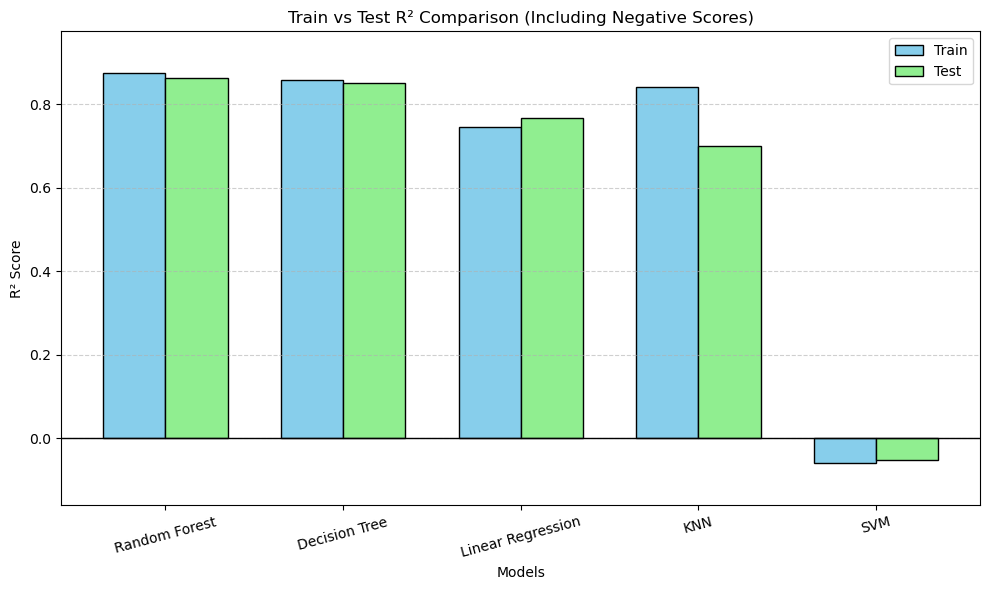

In [51]:
x = np.arange(len(results_df))
width = 0.35

plt.figure(figsize=(10,6))

plt.bar(x - width/2, results_df["Train Score"], width, label='Train', color='skyblue', edgecolor='black')
plt.bar(x + width/2, results_df["Test Score"], width, label='Test', color='lightgreen', edgecolor='black')

plt.axhline(0, color='black', linewidth=1)

plt.xlabel("Models")
plt.ylabel("R² Score")
plt.title("Train vs Test R² Comparison (Including Negative Scores)")
plt.xticks(x, results_df["Model"], rotation=15)

y_min = min(results_df["Train Score"].min(), results_df["Test Score"].min()) - 0.1
y_max = max(results_df["Train Score"].max(), results_df["Test Score"].max()) + 0.1
plt.ylim(y_min, y_max)

plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()
